In [1]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from skimage.measure import label, regionprops

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Read data
#Landmask
path = '/project/s916/davidle/RCE-LND/RCE_300_3km_1006x1006_ALL_ens0/output/'
file='lffd2011032100c.nc'
const = xr.open_mfdataset(path+file).squeeze()

#precip
path = '/project/s916/davidle/RCE-LND/analysis/RCE_300_3km_1006x1006_ALL_ens?/'
file='dhourmean.nc'
al = xr.open_mfdataset(path+file, concat_dim='ens').squeeze()


In [6]:
p = np.concatenate((al.TOT_PREC,np.expand_dims(al.TOT_PREC[:,0,:,:], axis=1)), axis=1) * 24 #Convert to mm/day
p = np.mean(p, axis=0)

In [7]:
land = const.FR_LAND[3:-3,3:-3]

In [8]:
island_labels = label(land,neighbors=8)
island_probs = regionprops(island_labels)

area = np.zeros(len(island_probs))
p_island_mean=np.zeros((25,len(island_probs)))


for hh in range(25):
    for i in range(len(island_probs)):
        island_probs = regionprops(island_labels,intensity_image=p[hh,:,:])
    
        area[i]=island_probs[i].area * 9 #Convert to km2
        p_island_mean[hh,i]=island_probs[i].mean_intensity
        
    #Sort by isalnd size
    arr1inds = np.argsort(area)
    area= area[arr1inds]
    p_island_mean[hh,:] = p_island_mean[hh,arr1inds]

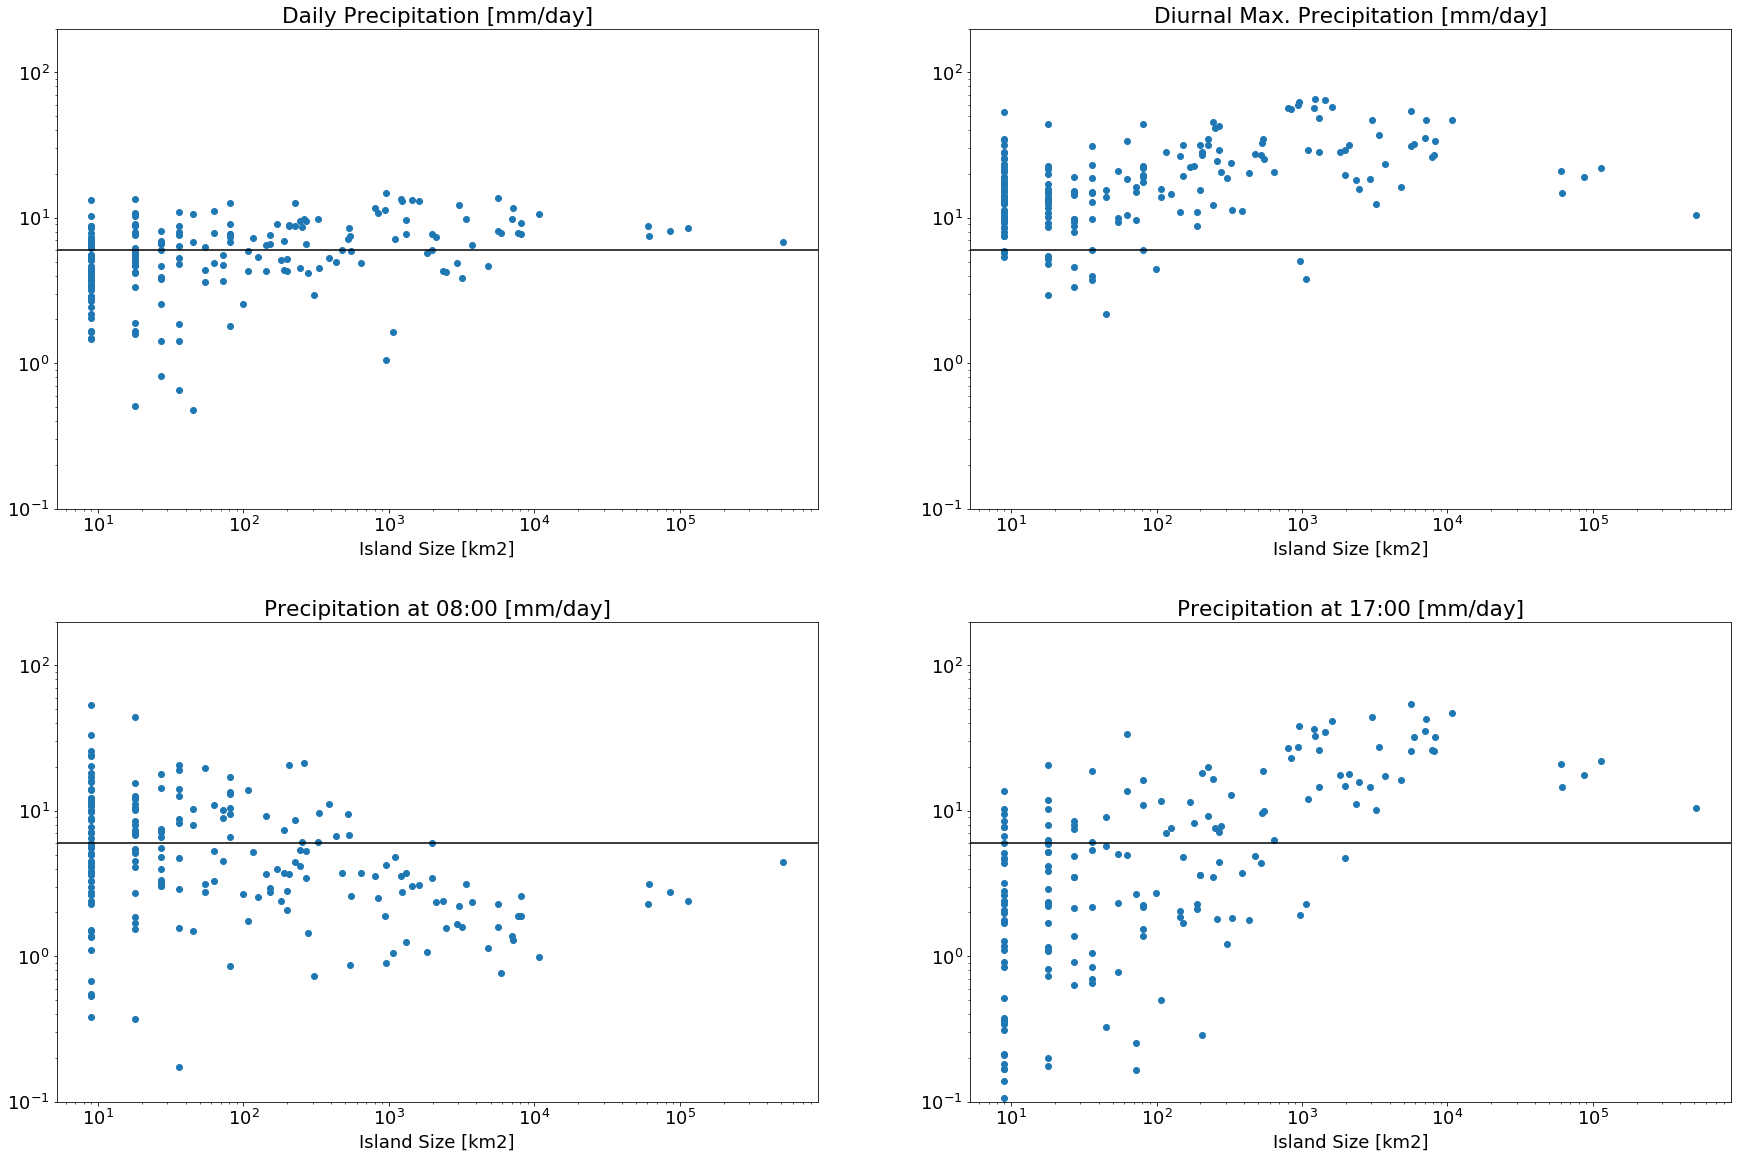

In [10]:
p_ocean = 5.7 #mm/day

plt.figure(figsize=(30, 20))
plt.rcParams.update({'font.size': 18})

plt.subplot(2,2,1, aspect='equal')
x=area
y=np.mean(p_island_mean[:,:]  , axis=0)

plt.scatter(x,y)
plt.xlabel("Island Size [km2]")
plt.title("Daily Precipitation [mm/day]")
plt.xscale("log")
plt.yscale("log")
plt.ylim(0.1,200)
plt.axhline(y=6, color='k')

plt.subplot(2,2,2, aspect='equal')
x=area
y=np.max(p_island_mean[:,:], axis=0)

plt.scatter(x,y)
plt.xlabel("Island Size [km2]")
plt.title("Diurnal Max. Precipitation [mm/day]")
plt.xscale("log")
plt.yscale("log")
plt.ylim(0.1,200)
plt.axhline(y=6, color='k')


plt.subplot(2,2,3, aspect='equal')
x=area
y=p_island_mean[8,:]

plt.scatter(x,y)
plt.xlabel("Island Size [km2]")
plt.title("Precipitation at 08:00 [mm/day]")
plt.xscale("log")
plt.yscale("log")
plt.ylim(0.1,200)
plt.axhline(y=6, color='k')

plt.subplot(2,2,4, aspect='equal')
x=area
y=p_island_mean[17,:]

plt.scatter(x,y)
plt.xlabel("Island Size [km2]")
plt.title("Precipitation at 17:00 [mm/day]")
plt.xscale("log")
plt.yscale("log")
plt.ylim(0.1,200)
plt.axhline(y=6, color='k')

plt.savefig('Island_Size.pdf')

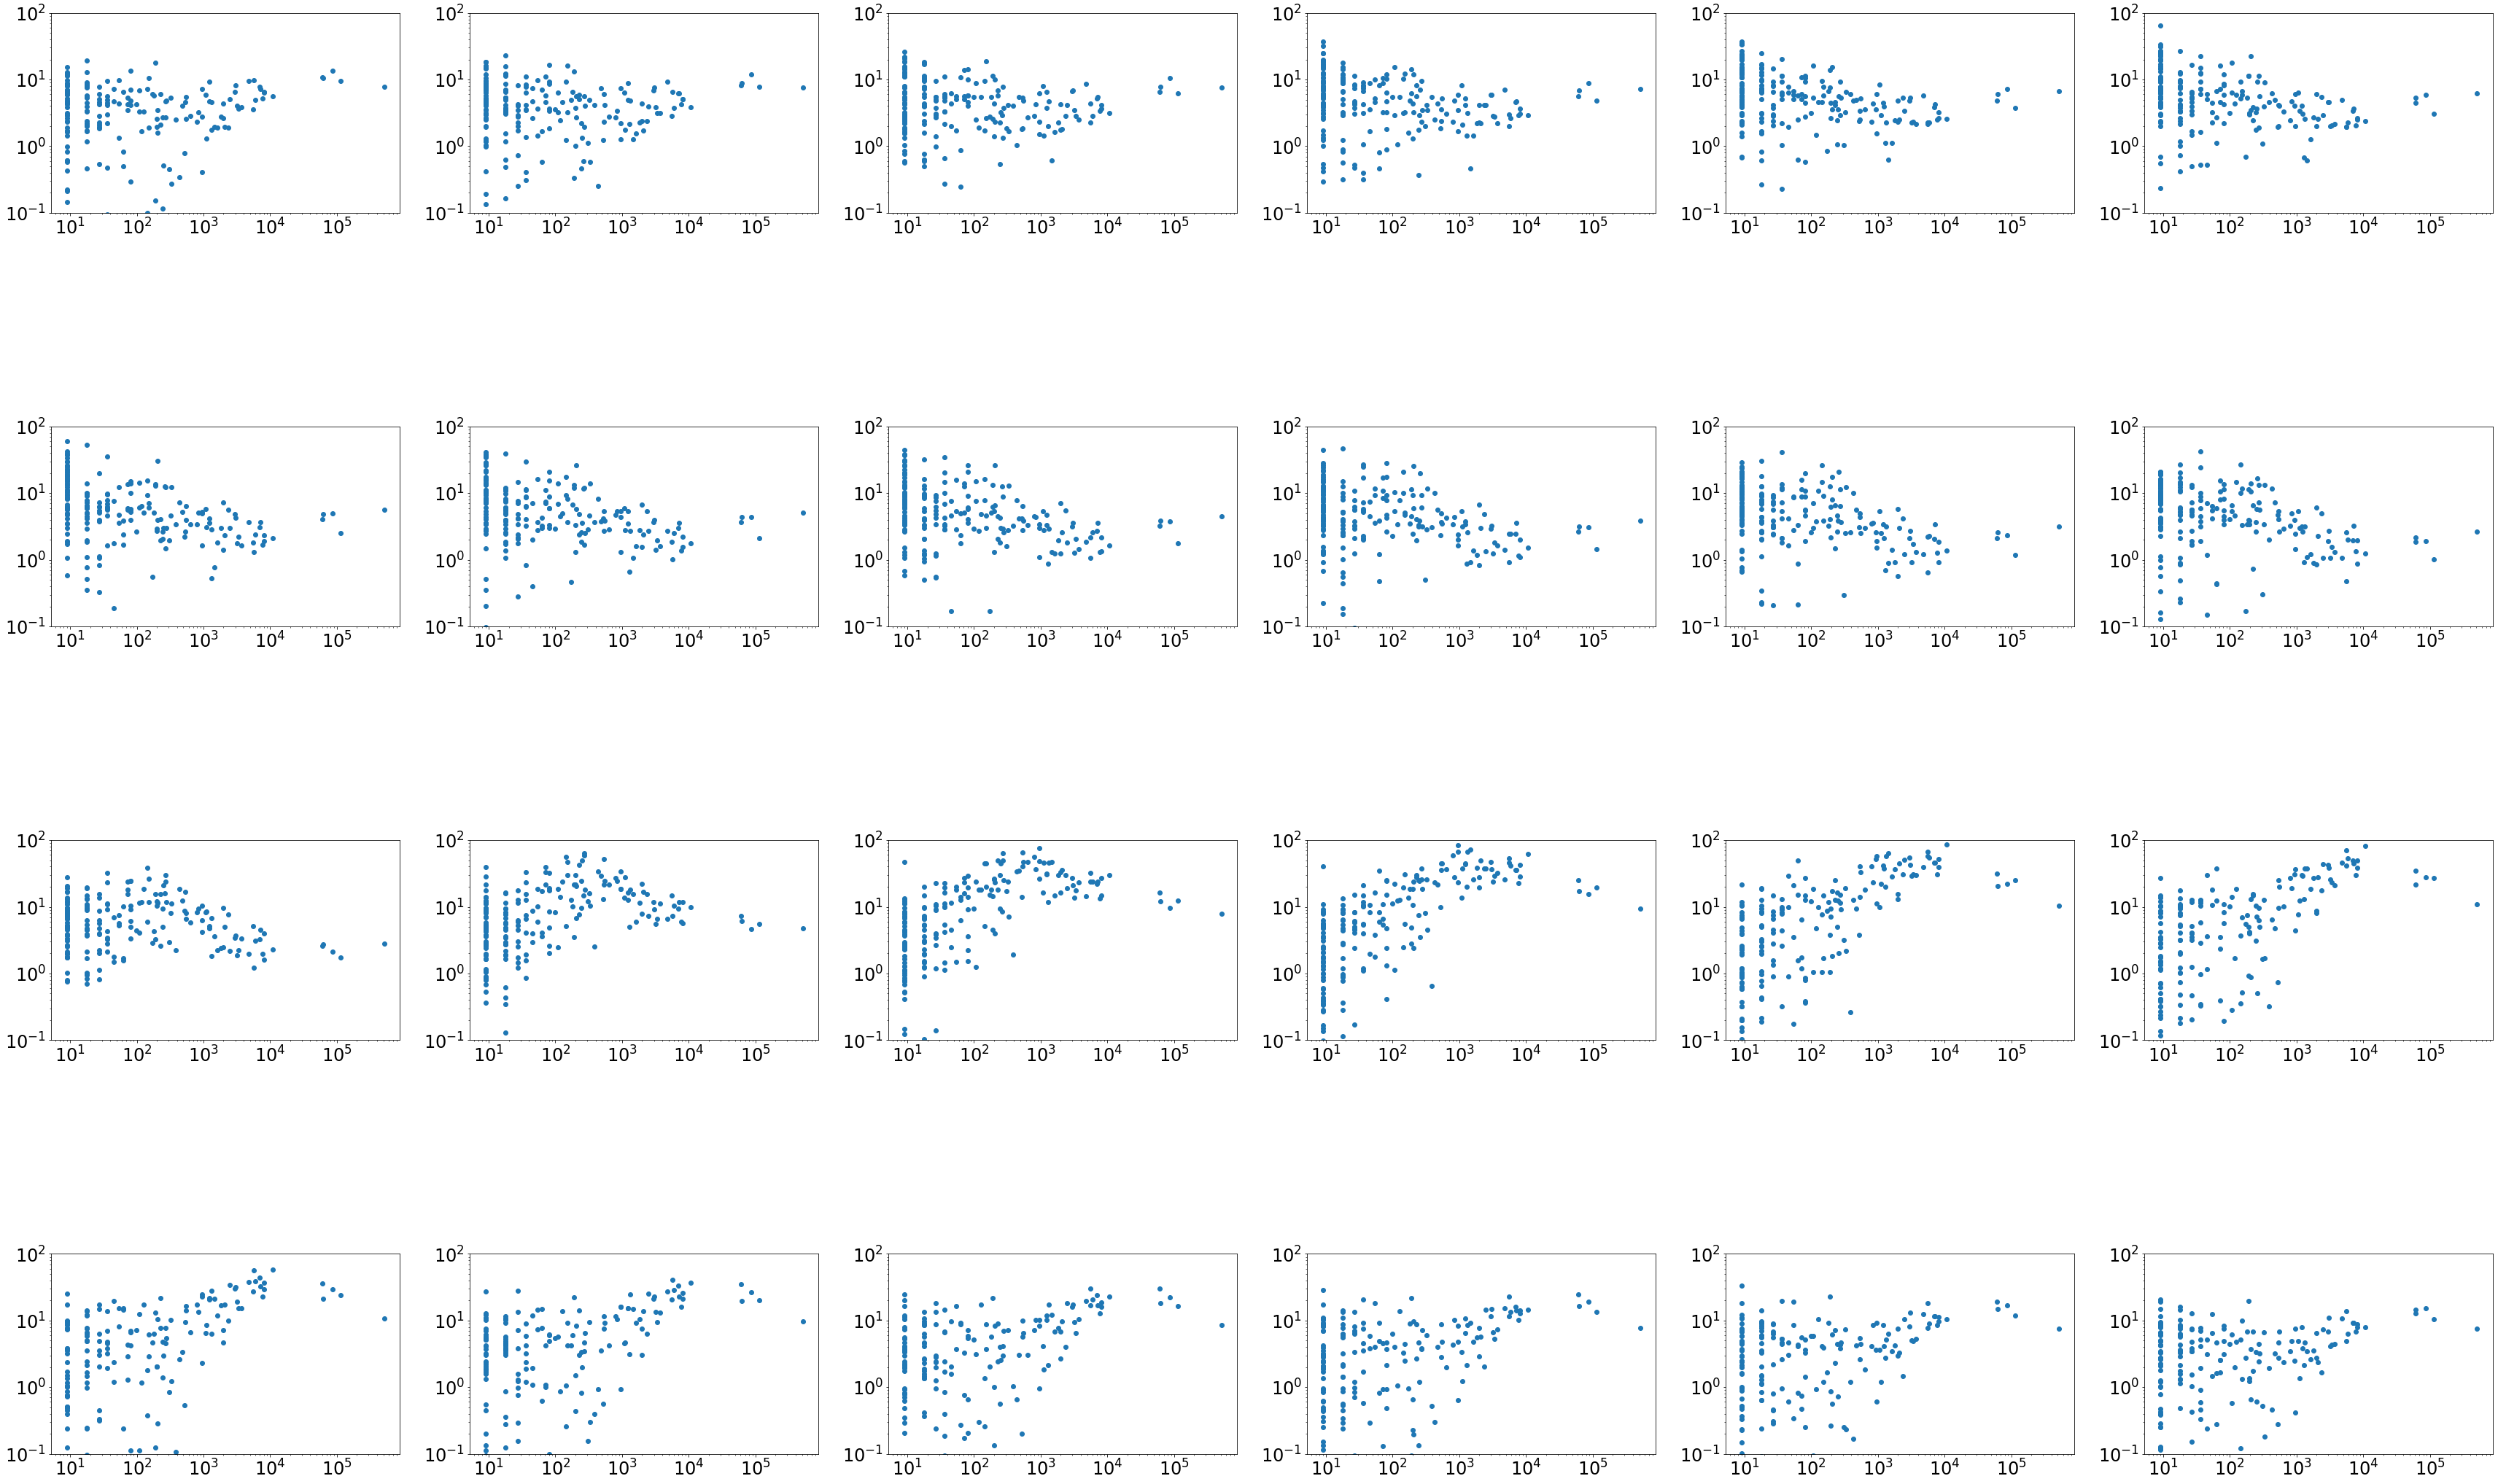

In [103]:
plt.figure(figsize=(60, 40))
plt.rcParams.update({'font.size': 24})

for hh in range(24):
    plt.subplot(4,6,hh+1, aspect='equal')
    x=area
    y=p_island_mean[hh,:]

    plt.scatter(x,y)
    #plt.xlabel("Island Size [km2]")
    #plt.ylabel("Daily Precipitation [mm/day]")
    plt.ylim(0.1,100)
    plt.xscale("log")
    plt.yscale("log")
